# Airline Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading in some airline data:

In [2]:
df0 = pd.read_csv("./example_data/airlines_10k.csv")

In [3]:
df0.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,YearFiveFold,YearTenFold
0,1987,10,1,4,1127.0,1120,1253.0,1250,PS,1459,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0
1,1987,10,18,7,1830.0,1830,1934.0,1929,PS,1460,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0
2,1987,10,23,5,2052.0,2000,2149.0,2059,PS,1465,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0
3,1987,10,8,4,645.0,645,808.0,803,PS,1468,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0
4,1987,10,25,7,1630.0,1630,1747.0,1736,PS,1473,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0


This data set has 31 columns of various types:

In [4]:
list(df0.columns)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'YearFiveFold',
 'YearTenFold']

All of this data is for a single year -- 1987:

In [5]:
df0.Year.unique()

array([1987])

# Question

What's the average distance flown out of SFO on Mondays by carrier in this year (1987)?

It's easy to find out!  First, we scope down the dataframe to get rid of some excess columns.

In [6]:
df1 = df0[df0.Origin == 'SFO'][['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Distance']]

In [7]:
df1.head(10)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Distance
0,1987,10,1,4,PS,550.0
3,1987,10,8,4,PS,447.0
17,1987,10,9,5,PS,326.0
19,1987,10,8,4,PS,733.0
22,1987,10,7,3,PS,326.0
23,1987,10,11,7,PS,326.0
49,1987,10,30,5,PS,337.0
55,1987,10,4,7,PS,679.0
74,1987,10,1,4,PS,414.0
75,1987,10,10,6,PS,447.0


No we can just look at Mondays (`DayOfWeek == 1`).

In [8]:
df = df1[df1.DayOfWeek == 1][['UniqueCarrier', 'Distance']]

And computing the averages is easy!

In [9]:
average_distances = df.groupby(['UniqueCarrier']).mean()

average_distances

,Distance
UniqueCarrier,
AA,725.000000
AS,679.000000
CO,967.000000
DL,1416.500000
PA (1),337.000000
PS,390.300000
TW,701.000000
UA,1020.733333
US,2099.000000


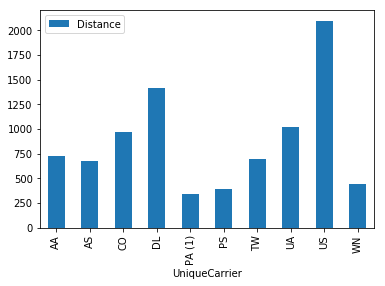

In [10]:
average_distances.plot.bar()

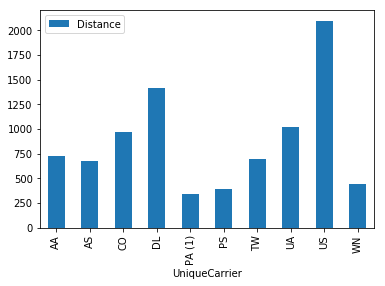

In [12]:
average_distances.plot.bar().figure.savefig("my_plot.png")